In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
t2g = pd.read_csv('t2gmap.csv', header=0)
encode = pd.read_csv('ENCFF068NRZ.tsv', sep='\t', header=0)

In [4]:
for index, row in encode.iterrows():
    target_id = encode.iloc[index]['gene_id']
    encode.at[index, 'gene_id'] = target_id.split('.')[0]

In [5]:
target_ids = []
for i in range(18):
    tf = 'KLF' + str(i+1)
    if tf == 'KLF13':
        target_ids.append(t2g[t2g['ext_gene']==tf]['ens_gene'].to_list()[2])
    else:    
        target_ids.append(t2g[t2g['ext_gene']==tf]['ens_gene'].to_list()[0])

In [6]:
t2g_dict = dict(zip(t2g['ens_gene'], t2g['ext_gene']))
subset = encode[encode['gene_id'].isin(target_ids)]
subset['ext_gene']=subset['gene_id'].map(t2g_dict)
subset = subset.sort_values(by='ext_gene')
subset['klf-number']=[1,10,11,12,13,14,15,16,17,18,2,3,4,5,6,7,8,9]
subset = subset.sort_values(by='klf-number')

<ipython-input-6-b06263ed169c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['ext_gene']=subset['gene_id'].map(t2g_dict)


In [7]:
lower_bound = np.asarray(subset['TPM']-subset['TPM_ci_lower_bound'])
lower_bound = lower_bound*(lower_bound>0)
upper_bound = np.asarray(subset['TPM_ci_upper_bound']-subset['TPM'])
upper_bound = upper_bound*(upper_bound>0)

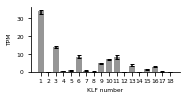

In [8]:
fig, ax = plt.subplots(figsize=(4/1.5,3/2.5))
fontsize=6
plt.bar(x=subset['klf-number'], height=subset['TPM'], color='#969696')
plt.errorbar(x=subset['klf-number'], y=subset['TPM'], yerr=[lower_bound, upper_bound], fmt='none', c='black', capsize=2)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18], fontsize = fontsize)
plt.ylabel('TPM', fontsize=fontsize)
plt.xlabel('KLF number', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('KLF_expression.pdf', dpi=300)

In [9]:
target_ids = []
for i in range(9):
    tf = 'SP' + str(i+1)
    target_ids.append(t2g[t2g['ext_gene']==tf]['ens_gene'].to_list()[0])

In [10]:
subset = encode[encode['gene_id'].isin(target_ids)]
t2g_dict = dict(zip(t2g['ens_gene'], t2g['ext_gene']))
subset['ext_gene']=subset['gene_id'].map(t2g_dict)
subset = subset.sort_values(by='ext_gene')
subset['sp-number']=[1,2,3,4,5,6,7,8,9]
subset = subset.sort_values(by='sp-number')

<ipython-input-10-b44ec6e27bb2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['ext_gene']=subset['gene_id'].map(t2g_dict)


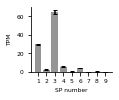

In [11]:
fig, ax = plt.subplots(figsize=(4/2.5,3/2.5))
fontsize=6
lower_bound = np.asarray(subset['TPM']-subset['TPM_ci_lower_bound'])
lower_bound = lower_bound*(lower_bound>0)
upper_bound = np.asarray(subset['TPM_ci_upper_bound']-subset['TPM'])
upper_bound = upper_bound*(upper_bound>0)
plt.bar(x=subset['sp-number'], height=subset['TPM'], color='#969696')
plt.errorbar(x=subset['sp-number'], y=subset['TPM'], yerr=[lower_bound, upper_bound], fmt='none', c='black', capsize=2)
plt.xticks([1,2,3,4,5,6,7,8,9])
plt.ylabel('TPM', fontsize=fontsize)
plt.xlabel('SP number', fontsize=fontsize)
plt.tick_params(axis='both', labelsize=fontsize)
ax.set_box_aspect(0.8)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('SP_expression.pdf', dpi=300)